In [15]:
import numpy as np
import json
import math
train = np.load('feats.npy')
train_labels = np.load('labels.npy')
np.random.seed(42)
theta = np.random.rand(15, 10000)

In [2]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def inference(theta, feats):
    """make a prediction given a vector of features"""
    eY = softmax(np.matmul(theta, feats))
    return eY
    

In [3]:
def updatedPredictionMatrix(inference, label, feats):
    """creates matrix for updating theta based off of gradient of softmax + cross/entropy"""
    inference[int(label)-1] = 1 - inference[int(label)-1]
    return -5 * np.matmul(inference.reshape(len(inference), 1), np.column_stack(feats))

def printLoss(inference, label):
    """print cross entropy loss, assuming actual y is one hot encoded"""
    loss = -math.log(inference[int(label)-1])
    print('Loss:', loss)
    
def loss(inference, label):
    """return cross entropy loss, assuming actual y is one hot encoded"""
    try:
        ans = -math.log(inference[int(label)-1])
        return ans
    except ValueError:
        return 0

def evalLoss(theta, train, label):
    avgloss = 0
    for x in range(len(train)):
        los = loss(softmax(inference(theta, train[x])), label[x])
#         pred = softmax(inference(theta, train[x]))
        avgloss += los
#         if (los > 3):
#             print(los)
#             qualitative(x, theta, train, label)
    return avgloss / len(train)

def evalAccuracy(theta, train, label):
    correct = 0
    for x in range(len(train)):
        pred = np.argmax(softmax(inference(theta, train[x])))
        if (pred == int(label[x])):
            correct += 1
    return round(correct / len(train), 4)

In [4]:
def full_gradient_descent(theta, labels, train):
    N = len(train)
    updateM = np.zeros((15, 10000))
    print("Beginning ", end = '')
    y = np.linalg.norm(theta)
    print(evalTrain(theta, train, labels))
    for x in range(len(train)):
        expY = inference(theta, train[x])
        update = updatedPredictionMatrix(expY, labels[x], train[x])
        if ( x % 1000 == 0):
            print('Step', str(x)+'/'+str(N)+'  ')
        update = np.add(update, updateM)
    theta = np.add(theta, update)
    print("End ", end='')
    print(evalTrain(theta, train, labels))
    return theta

In [5]:
# for x in range(10):
#     print("epoch", x)
#     theta = full_gradient_descent(theta, train_labels, train)

In [6]:

def stochastic_descent(theta, labels, train):
    N = len(train)
    updateM = np.zeros((15, 10000))
    y = np.linalg.norm(theta)
    for x in range(100):
        randSample = np.random.randint(0, train.shape[0])
        expY = inference(theta, train[randSample]) #correct?
        update = updatedPredictionMatrix(expY, labels[x], train[randSample])
#             print('Step', str(x)+'/'+str(N)+'  ')
        update = np.add(update, updateM)
    theta = np.add(theta, update)
    print("Loss: ", end='')
    print(evalLoss(theta, train, labels))
    print('Accuracy: ', str(evalAccuracy(theta, train, labels))+'%')
    return theta

        

In [12]:
print("Beginning Loss: ", end = '')
print(evalLoss(theta, train, train_labels))
for x in range(10):
    print("Beginning epoch", x, end = '\n\n')
    theta = stochastic_descent(theta, train_labels, train)
    print()

Beginning Loss: 2.715930227582408
Beginning epoch 0

Loss: 2.721160163797172
Accuracy:  0.062%

Beginning epoch 1

Loss: 2.7388231008936104
Accuracy:  0.069%

Beginning epoch 2

Loss: 2.7278051753457477
Accuracy:  0.0597%

Beginning epoch 3

Loss: 2.718367081363263
Accuracy:  0.046%

Beginning epoch 4

Loss: 2.728201500486142
Accuracy:  0.05%

Beginning epoch 5

Loss: 2.7142496823160056
Accuracy:  0.0417%

Beginning epoch 6

Loss: 2.7228029554452786
Accuracy:  0.0407%

Beginning epoch 7

Loss: 2.723886766647392
Accuracy:  0.0327%

Beginning epoch 8

Loss: 2.7124039521952876
Accuracy:  0.0277%

Beginning epoch 9

Loss: 2.7063494450094456
Accuracy:  0.0467%



In [8]:
def qualitative(y, theta, train, labels):
    pred = softmax(inference(theta, train[y]))
    for i, x in enumerate(pred):
        print(i+1, x)
    print('prediction:', np.argmax(pred)+1)
    print('actual:', int(labels[y]))
    print('loss:', loss(pred, labels[y]))

array([0.01416432, 0.0051974 , 0.00449775, ..., 0.        , 0.        ,
       0.        ])

In [27]:
with open('data/training.txt', 'r') as fin:
    x = fin.read().splitlines()
a = x[0].split(' ')
noThe = 0
for x in range(len(a)-1):
    if a[x] == 'the':
        noThe += 1
print(noThe/len(a)*math.log(3000/2995)*10000)


1.4164321034889724


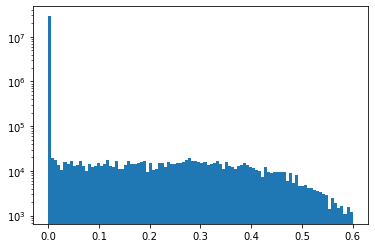

In [48]:
import matplotlib.pyplot as plt
x = np.reshape(train, train.shape[0]*train.shape[1])
plt.hist(x, bins = 100, range=[0, .6])
plt.yscale('log')
plt.show()

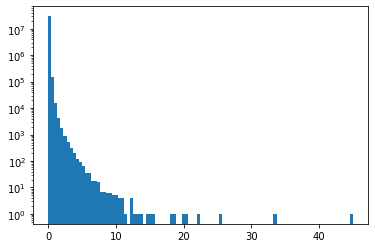

In [51]:
x = np.reshape(train, train.shape[0]*train.shape[1])
plt.hist(x, bins = 100, range=[0, 45])
plt.yscale('log')
plt.show()